Machine Learning Coursework
COIY065H7
2018 - 2019






Raúl Barrué García, 
rbarru01@mail.bbk.ac.uk, 
Birkbeck, University of London, 
MSc Data Science








I have read and understood the
sections of plagiarism in the College Policy on assessment offences and confirm that
the work is my own, with the work of others clearly acknowledged. I give my
permission to submit my report to the plagiarism testing database that the College is
using and test it using plagiarism detection software, search engines or metasearching
software.


# DATASET

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
dataset = pd.read_csv("./dataset/yeast.data", header = None, sep = "\s+")
dataset.columns = ["Sequence Name", "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc", "Class"]

In [3]:
print("Percentage of occurences within the dataset")
round((dataset["Class"].value_counts()/1484)*100,2)

Percentage of occurences within the dataset


CYT    31.20
NUC    28.91
MIT    16.44
ME3    10.98
ME2     3.44
ME1     2.96
EXC     2.36
VAC     2.02
POX     1.35
ERL     0.34
Name: Class, dtype: float64

In [4]:
dataset.head()

,Sequence Name,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [5]:
dataset.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [6]:
#Drop Sequence Name column since it doesn't add any value
dataset = dataset.drop(["Sequence Name"], axis = 1)

# NEURAL NETWORK

Using TensorFlow backend.


Test accuracy: 0.5959595963609741


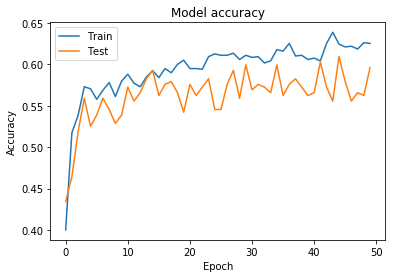

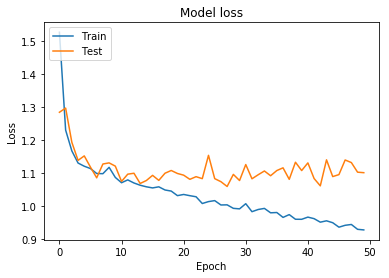

In [7]:
%matplotlib inline
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy

#Read the dataset
dataset = pd.read_csv("./dataset/yeast.data", header = None, sep = "\s+")
dataset.columns = ["Sequence Name", 
                    "mcg", 
                    "gvh", 
                    "alm", 
                    "mit", 
                    "erl", 
                    "pox", 
                    "vac", 
                    "nuc", 
                    "Class"
                    ]

#The column "Sequence Name" is just a database label that I'm not going to use to make predictions
dataset = dataset.drop(["Sequence Name"], axis = 1)

### NEURAL NETWORK ###

# Random seed for reproducibility
numpy.random.seed(7)

# Split the data in train and test datasets
train, test = train_test_split(dataset, test_size=0.2)

# Train
target_train = train.iloc[:, -1].values # Take only the last colum which is the value we want to predict
predictors_train = train.iloc[:, :8].values # Same as before but the opposite, remove last column

#Test
target_test = test.iloc[:, -1].values
predictors_test = test.iloc[:, :8].values

# In order for the NN to make a classification prediction, a labeled target needs to be a number,
# which is then converted to categorical.
le = LabelEncoder()

target_train = le.fit_transform(target_train)
target_train = to_categorical(target_train).astype("int32")

target_test = le.fit_transform(target_test)
target_test = to_categorical(target_test).astype("int32")

# Create the model
n_cols = 8 #number of predictors
model = Sequential()

model.add(Dense(100, activation = "tanh", input_shape = (n_cols,), name = "dense1"))
model.add(Dense(100, activation = "tanh", name = "dense2"))
model.add(Dense(100, activation = "tanh", name = "dense3"))
model.add(Dense(10, activation = "softmax", name = "dense4"))

# Compile and fit the model
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
#stop = EarlyStopping(patience = 5)

history = model.fit(predictors_train, target_train, epochs = 50, batch_size = 5, validation_data = (predictors_test, target_test), verbose = 0)

# Make predictions
#predictions = model.predict(predictors_test)

# Test model accuracy
score, acc = model.evaluate(predictors_test, target_test, verbose = 2)
print("Test accuracy:", acc)


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 100)               900       
_________________________________________________________________
dense2 (Dense)               (None, 100)               10100     
_________________________________________________________________
dense3 (Dense)               (None, 100)               10100     
_________________________________________________________________
dense4 (Dense)               (None, 10)                1010      
Total params: 22,110
Trainable params: 22,110
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Create confusion matrix
predictions = model.predict(predictors_test)
matrix = confusion_matrix(target_test.argmax(axis=1), predictions.argmax(axis=1))
matrix_df = pd.DataFrame(matrix)
matrix_df.columns = ["CYT",
                    "NUC",
                    "MIT",
                    "ME3",
                    "ME2",
                    "ME1",
                    "EXC",
                    "VAC",
                    "POX",
                    "ERL"]

matrix_df = matrix_df.rename({0:"CYT", 1:"NUC", 2:"MIT", 3:"ME3", 4:"ME2", 5:"ME1", 6:"EXC", 7:"VAC", 8:"POX", 9:"ERL"})

matrix_df

,CYT,NUC,MIT,ME3,ME2,ME1,EXC,VAC,POX,ERL
CYT,55,0,0,0,0,3,7,30,0,0
NUC,0,1,0,0,0,1,0,0,0,0
MIT,1,0,1,1,0,0,0,0,0,0
ME3,0,0,1,6,0,0,2,0,0,0
ME2,0,0,0,2,1,5,2,3,0,0
ME1,3,0,0,0,0,37,0,2,0,0
EXC,11,0,0,1,1,3,24,4,0,0
VAC,22,1,0,0,0,6,3,52,0,0
POX,0,0,0,0,0,0,1,0,0,0
ERL,3,0,0,0,0,1,0,0,0,0


In [9]:
# Balancing the dataset with StratifiedKFold

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import numpy
import pandas as pd

seed = 7
numpy.random.seed(seed)

#Read the dataset
dataset = pd.read_csv("./dataset/yeast.data", header = None, sep = "\s+")
dataset.columns = ["Sequence Name", 
                    "mcg", 
                    "gvh", 
                    "alm", 
                    "mit", 
                    "erl", 
                    "pox", 
                    "vac", 
                    "nuc", 
                    "Class"
                    ]

#The column "Sequence Name" is just a database label that I'm not going to use to make predictions
dataset = dataset.drop(["Sequence Name"], axis = 1)


# split into input (X) and output (Y) variables
X = dataset.values[:, :8]

le = LabelEncoder()

Y = dataset.values[:, -1]
Y = le.fit_transform(Y)


kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train1, test1 in kfold.split(X, Y):
    # Create the model
    n_cols = 8 #number of predictors
    model2 = Sequential()

    model2.add(Dense(100, activation = "tanh", input_shape = (n_cols,)))
    model2.add(Dense(100, activation = "tanh"))
    model2.add(Dense(100, activation = "tanh"))
    model2.add(Dense(10, activation = "softmax")) # softmax because it's a classification prediction

    # Compile and fit the model
    model2.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
    model2.fit(X[train1], Y[train1], epochs = 50, verbose = 0)
    # evaluate the model
    scores = model2.evaluate(X[test1], Y[test1], verbose=0, batch_size=10)
    print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


acc: 64.47%
acc: 66.23%
acc: 54.61%
acc: 56.67%
acc: 64.19%
acc: 63.01%
acc: 57.53%
acc: 57.82%
acc: 57.53%
acc: 56.16%
59.82% (+/- 3.96%)


# Support Vector Classifier

In [4]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

#Read the dataset
dataset = pd.read_csv("./dataset/yeast.data", header = None, sep = "\s+")
dataset.columns = ["Sequence Name", 
                    "mcg", 
                    "gvh", 
                    "alm", 
                    "mit", 
                    "erl", 
                    "pox", 
                    "vac", 
                    "nuc", 
                    "Class"
                    ]

#The column "Sequence Name" is just a database label that I'm not going to use to make predictions
dataset = dataset.drop(["Sequence Name"], axis = 1)

# Random seed for reproducibility
np.random.seed(7)

# Split the data in train and test datasets
train, test = train_test_split(dataset, test_size=0.2)

# Train
Y_train = train.iloc[:, -1].values # Take only the last colum which is the value we want to predict
X_train = train.iloc[:, :8].values # Same as before but the opposite, remove last column

#Test
Y_test = test.iloc[:, -1].values
X_test = test.iloc[:, :8].values

In [21]:
kernels = ['poly', 'linear', 'rbf', 'sigmoid']

for k in kernels:
    model3 = svm.SVC(kernel = k)
    model3.fit(X_train, Y_train)
    y_pred = model3.predict(X_test)
    acc = round(metrics.accuracy_score(Y_test, y_pred), 2)
    print("Kernel {} accuracy: ".format(k), acc)

Kernel poly accuracy:  0.32
Kernel linear accuracy:  0.57
Kernel rbf accuracy:  0.4
Kernel sigmoid accuracy:  0.38


In [5]:
# Balancing the dataset

model3 = svm.SVC(kernel = "linear", C = 8, class_weight='balanced')
model3.fit(X_train, Y_train)
y_pred = model3.predict(X_test)
acc = round(metrics.accuracy_score(Y_test, y_pred), 2)
print("Kernel {} accuracy: ".format("linear"), acc)

Kernel linear accuracy:  0.52


In [7]:
matrix2 = confusion_matrix(Y_test, y_pred)
matrix_df2 = pd.DataFrame(matrix2)
matrix_df2.columns = ["CYT",
                    "NUC",
                    "MIT",
                    "ME3",
                    "ME2",
                    "ME1",
                    "EXC",
                    "VAC",
                    "POX",
                    "ERL"]

matrix_df2 = matrix_df2.rename({0:"CYT", 1:"NUC", 2:"MIT", 3:"ME3", 4:"ME2", 5:"ME1", 6:"EXC", 7:"VAC", 8:"POX", 9:"ERL"})

matrix_df2

,CYT,NUC,MIT,ME3,ME2,ME1,EXC,VAC,POX,ERL
CYT,51,0,1,0,3,3,7,13,0,17
NUC,0,2,0,0,0,0,0,0,0,0
MIT,0,0,1,1,0,0,0,0,0,1
ME3,0,0,3,5,1,0,0,0,0,0
ME2,0,0,3,3,4,1,0,1,0,1
ME1,0,0,0,0,0,34,0,2,0,6
EXC,7,0,1,1,2,3,25,2,0,3
VAC,34,1,0,0,2,6,6,30,0,5
POX,0,0,0,0,0,0,0,0,1,0
ERL,3,0,0,0,0,1,0,0,0,0
